# CNN (CONVOLUTIONAL Neural Network) :

Epoch 1/10
308/308 [==============================] - 10s 13ms/step - loss: 0.3486 - accuracy: 0.8547 - val_loss: 0.2067 - val_accuracy: 0.9008
Epoch 2/10
308/308 [==============================] - 3s 9ms/step - loss: 0.1992 - accuracy: 0.9233 - val_loss: 0.1551 - val_accuracy: 0.9291
Epoch 3/10
308/308 [==============================] - 3s 10ms/step - loss: 0.1525 - accuracy: 0.9446 - val_loss: 0.1341 - val_accuracy: 0.9516
Epoch 4/10
308/308 [==============================] - 3s 9ms/step - loss: 0.1434 - accuracy: 0.9486 - val_loss: 0.1200 - val_accuracy: 0.9428
Epoch 5/10
308/308 [==============================] - 3s 10ms/step - loss: 0.1284 - accuracy: 0.9545 - val_loss: 0.1257 - val_accuracy: 0.9513
Epoch 6/10
308/308 [==============================] - 3s 10ms/step - loss: 0.1376 - accuracy: 0.9516 - val_loss: 0.1083 - val_accuracy: 0.9574
Epoch 7/10
308/308 [==============================] - 3s 9ms/step - loss: 0.1099 - accuracy: 0.9594 - val_loss: 0.1304 - val_accuracy: 0.9516
E

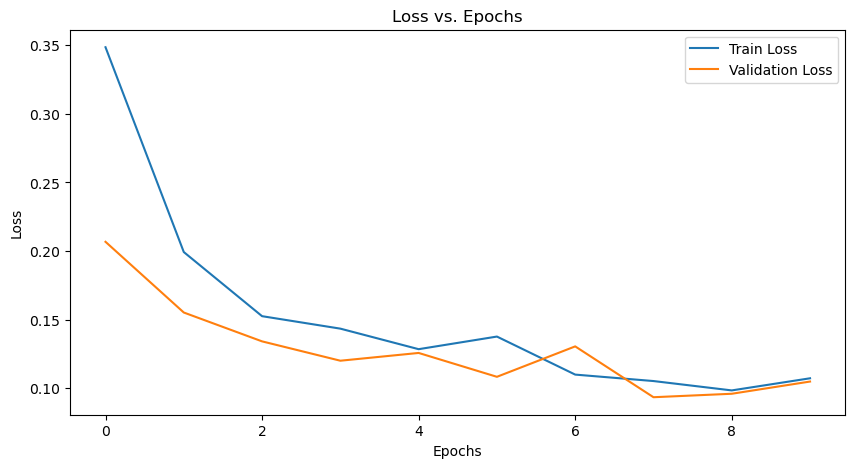

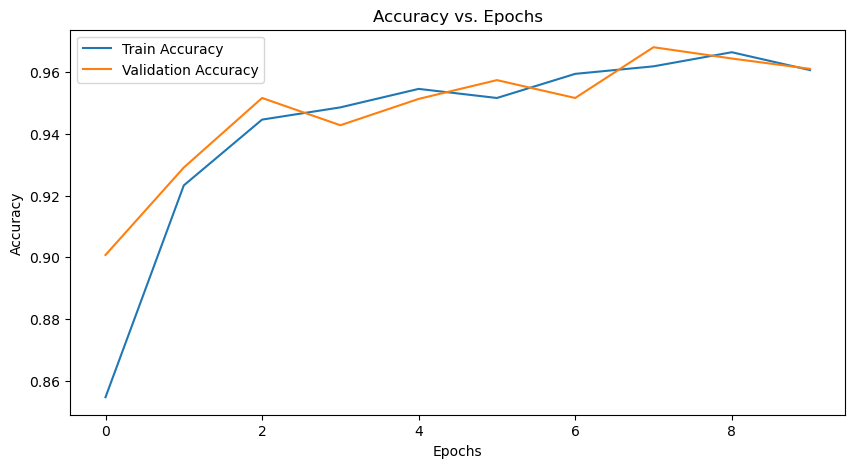

103/103 [==============================] - 2s 5ms/step
Accuracy: 0.9555690809494827
Precision: 0.9608904933814681
Recall: 0.9517282479141835
F1 Score: 0.9562874251497007
auc-Score: 0.96


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras import layers, models
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Chargement du dataset
df = pd.read_csv('../final_cleaned.csv')

# Séparation des features (X) et de la variable cible (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Division des données en ensembles d'entraînement, de validation et de test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Remodelage des données pour une entrée CNN
X_train = X_train.values.reshape(-1, X_train.shape[1], 1)  # Remarquez le remodelage ici
X_validation = X_validation.values.reshape(-1, X_validation.shape[1], 1)
X_test = X_test.values.reshape(-1, X_test.shape[1], 1)

# Créez le modèle CNN
model = models.Sequential()

# Couche de convolution 1
model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(2))

# Couche de convolution 2
model.add(layers.Conv1D(64, 2, activation='relu'))
model.add(layers.GlobalMaxPooling1D())  # Utilisation de GlobalMaxPooling1D au lieu de MaxPooling1D

# Couche fully connected (densément connectée)
model.add(layers.Dense(128, activation='relu'))

# Couche de sortie
model.add(layers.Dense(1, activation='sigmoid'))  # Une seule sortie binaire (fraude ou non)

# Compilation du modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary cross-entropy pour une classification binaire
              metrics=['accuracy'])

# Entraînez le modèle
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_validation, y_validation))

# Visualisation de l'historique d'entraînement
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.show()


# Visualisation de l'historique d'entraînement
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Utilisez 'accuracy' ou 'acc' selon votre historique
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Utilisez 'val_accuracy' ou 'val_acc'
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.show()

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Seuil de décision pour les prédictions binaires

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"auc-Score: {auc:.2f}")


In [2]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Calcul des métriques
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)


rnn_results = pd.DataFrame([['convolutional neurual network', acc,prec,rec, f1, auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Sauvegardez le DataFrame dans un fichier CSV
rnn_results.to_csv('../evaluations/cnn_results.csv', index=False)

rnn_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,convolutional neurual network,0.955569,0.96089,0.951728,0.956287,0.955653


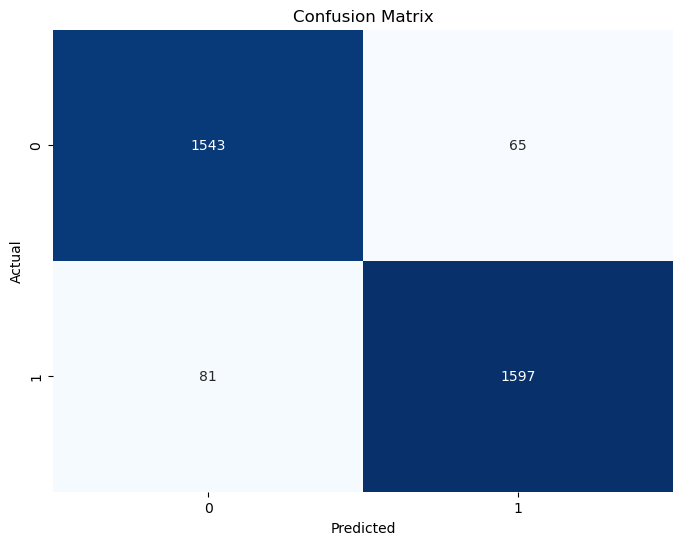

In [3]:

# Affichage de la matrice de confusion
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

